In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66         

In [5]:
#  Data Preprocessing
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True) 

In [6]:
# Encode categorical variables (if any)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoder for potential future use

In [7]:
# Define features and target variable
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual target column
y = df['Outcome']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{model.__class__.__name__} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

LogisticRegression Performance:
Accuracy: 0.7446
Precision: 0.6774
Recall: 0.5185
F1 Score: 0.5874
ROC-AUC: 0.8379


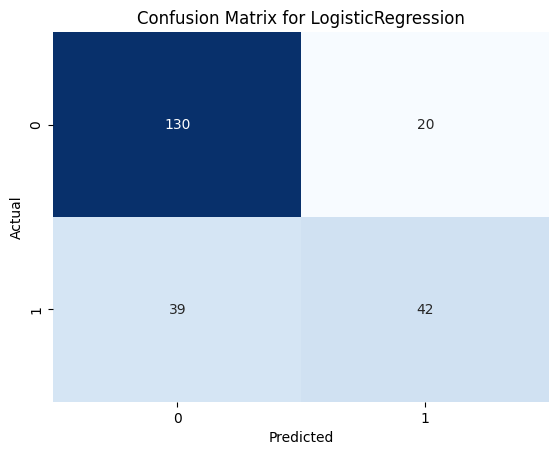

In [11]:
# Model Selection and Training
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test)

DecisionTreeClassifier Performance:
Accuracy: 0.7619
Precision: 0.7031
Recall: 0.5556
F1 Score: 0.6207
ROC-AUC: 0.7144


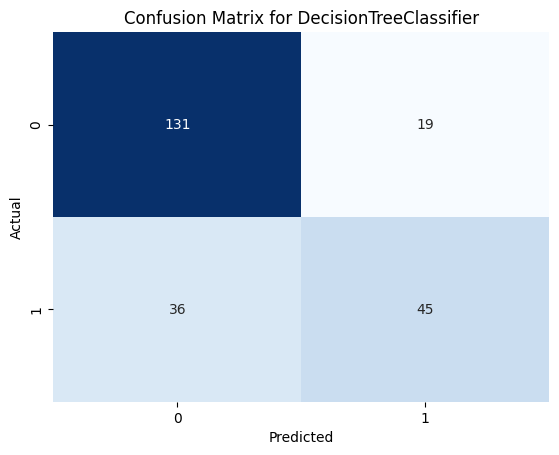

In [12]:
# 2. Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
evaluate_model(tree, X_test, y_test)

RandomForestClassifier Performance:
Accuracy: 0.7532
Precision: 0.6875
Recall: 0.5432
F1 Score: 0.6069
ROC-AUC: 0.8184


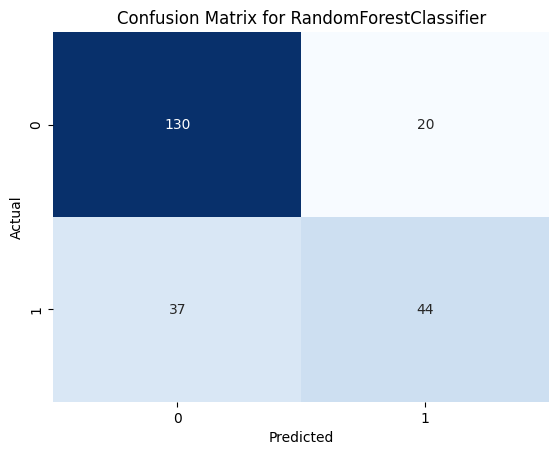

In [13]:
# 3. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

SVC Performance:
Accuracy: 0.7532
Precision: 0.6875
Recall: 0.5432
F1 Score: 0.6069
ROC-AUC: 0.8114


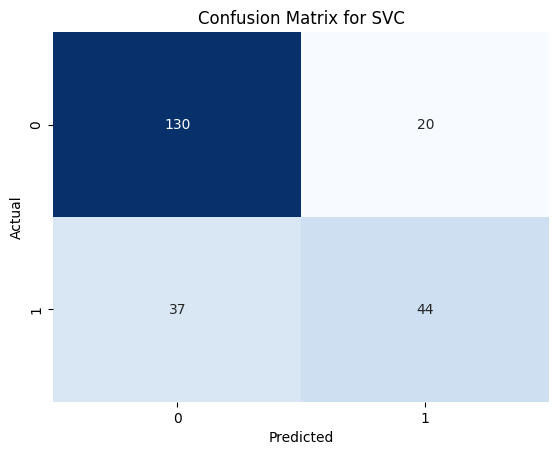

In [14]:
# 4. Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)

KNeighborsClassifier Performance:
Accuracy: 0.7143
Precision: 0.6154
Recall: 0.4938
F1 Score: 0.5479
ROC-AUC: 0.7600


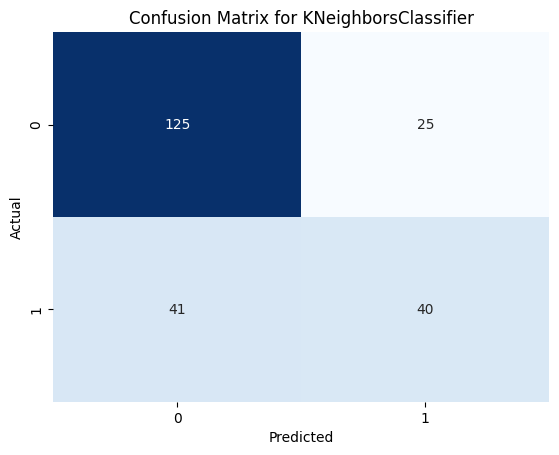

In [15]:
# 5. k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)


In [16]:
# Implementing Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('tree', tree),
        ('rf', rf),
        ('svm', svm),
        ('knn', knn)
    ], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('tree', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

VotingClassifier Performance:
Accuracy: 0.7706
Precision: 0.7258
Recall: 0.5556
F1 Score: 0.6294
ROC-AUC: 0.8346


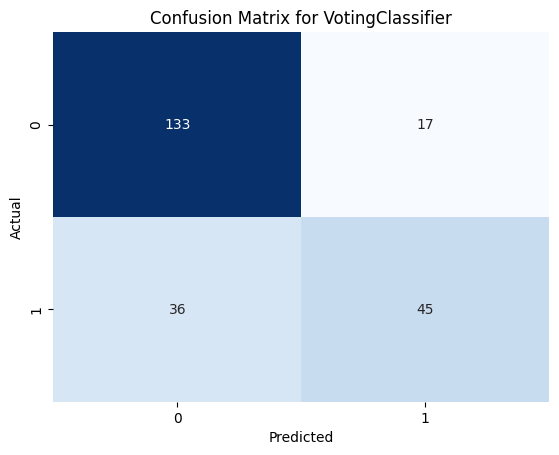

In [17]:
# Evaluate the Voting Classifier
evaluate_model(voting_clf, X_test, y_test)

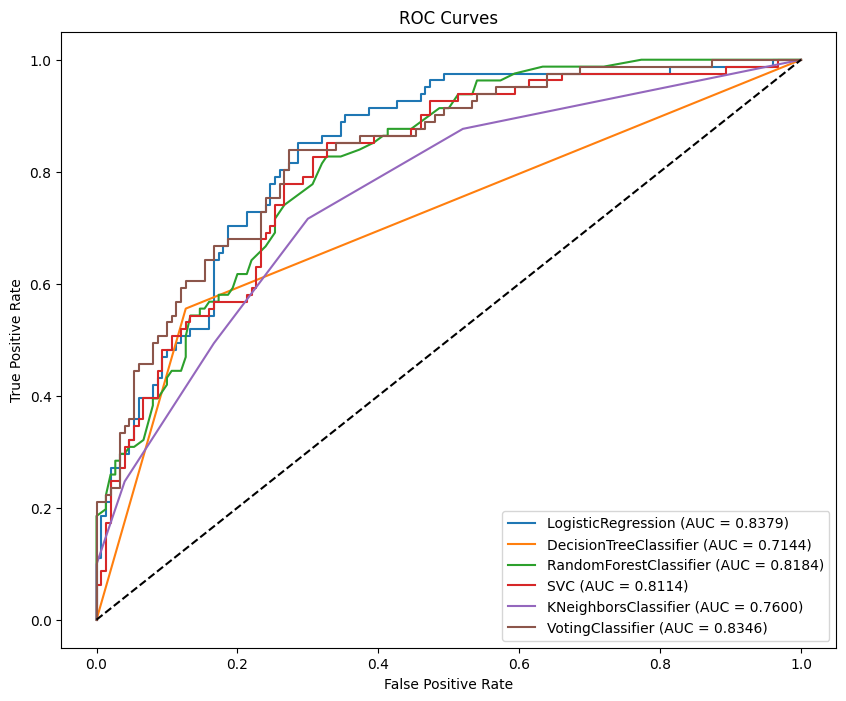

In [20]:
# Visualizations
# Plot ROC curves for each model
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))

models = [log_reg, tree, rf, svm, knn, voting_clf]
for model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()